In [1]:
import BandaiDataset as bd

data = bd.BandaiDataset()
data.get_filenames()

['dataset-1_bow_active_001',
 'dataset-1_bow_angry_001',
 'dataset-1_bow_childish_001',
 'dataset-1_bow_chimpira_001',
 'dataset-1_bow_feminine_001',
 'dataset-1_bow_giant_001',
 'dataset-1_bow_happy_001',
 'dataset-1_bow_masculinity_001',
 'dataset-1_bow_musical_001',
 'dataset-1_bow_normal_001',
 'dataset-1_bow_not-confident_001',
 'dataset-1_bow_old_001',
 'dataset-1_bow_proud_001',
 'dataset-1_bow_sad_001',
 'dataset-1_bow_tired_001',
 'dataset-1_byebye_active_001',
 'dataset-1_byebye_angry_001',
 'dataset-1_byebye_childish_001',
 'dataset-1_byebye_chimpira_001',
 'dataset-1_byebye_feminine_001',
 'dataset-1_byebye_giant_001',
 'dataset-1_byebye_happy_001',
 'dataset-1_byebye_masculinity_001',
 'dataset-1_byebye_musical_001',
 'dataset-1_byebye_normal_001',
 'dataset-1_byebye_not-confident_001',
 'dataset-1_byebye_old_001',
 'dataset-1_byebye_proud_001',
 'dataset-1_byebye_sad_001',
 'dataset-1_byebye_tired_001',
 'dataset-1_bye_active_001',
 'dataset-1_bye_angry_001',
 'dataset-1_

In [2]:
data.load()
data.max_frame


dataset-1_bow_active_001: stream end
129
dataset-1_bow_angry_001: stream end
91
dataset-1_bow_childish_001: stream end
99
dataset-1_bow_chimpira_001: stream end
118
dataset-1_bow_feminine_001: stream end
219
dataset-1_bow_giant_001: stream end
123
dataset-1_bow_happy_001: stream end
139
dataset-1_bow_masculinity_001: stream end
71
dataset-1_bow_musical_001: stream end
157
dataset-1_bow_normal_001: stream end
139
dataset-1_bow_not-confident_001: stream end
146
dataset-1_bow_old_001: stream end
173
dataset-1_bow_proud_001: stream end
138
dataset-1_bow_sad_001: stream end
222
dataset-1_bow_tired_001: stream end
166
dataset-1_byebye_active_001: stream end
230
dataset-1_byebye_angry_001: stream end
56
dataset-1_byebye_childish_001: stream end
170
dataset-1_byebye_chimpira_001: stream end
150
dataset-1_byebye_feminine_001: stream end
85
dataset-1_byebye_giant_001: stream end
236
dataset-1_byebye_happy_001: stream end
221
dataset-1_byebye_masculinity_001: stream end
202
dataset-1_byebye_music

-1

In [3]:
data.normalize()
data.max_frame

4752

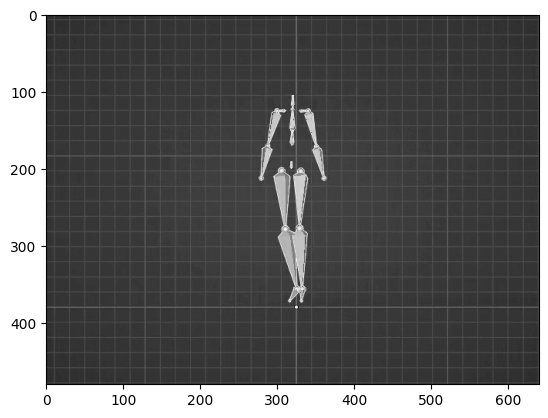

In [7]:
data.min_frame
data[1].draw_pose(1)

In [3]:
from torch.utils.data import DataLoader, random_split
import multiprocessing as mp

def load_data(file_list_path= '', data_path='', batch_sz = 5, train_val_test_split = [0.7,0.1,0.2]):
    assert sum(train_val_test_split) == 1, "Train, val and test fractions should sum to 1!" 
    dataset = bd.BandaiDataset(data_path)
    dataset.get_filenames()

    tr_va_te = []
    n_cpus = mp.cpu_count()
    
    for frac in train_val_test_split:
        num = round(frac * dataset.num_of_files)
        tr_va_te.append(num)

    train_split, val_split, test_split = random_split(dataset, tr_va_te)

    train_dl = DataLoader(train_split,
                          batch_size=batch_sz,
                          shuffle=True,
                          num_workers=n_cpus
                        )
    val_dl = DataLoader(val_split,
                        batch_size=batch_sz,
                        shuffle=True,
                        num_workers=n_cpus)
    test_dl = DataLoader(test_split,
                         batch_size=batch_sz,
                         shuffle=True,
                         num_workers=n_cpus)

    return train_dl, val_dl, test_dl

[]


In [4]:
MODEL_DIR = "./saved_models"
DATASET_DIR = "./datasets/data/"
FILELIST_PATH = "datafiles.txt"

train_dl, val_dl, test_dl = load_data()




In [4]:
import torch
def custom_collate_fn(batch):
    motion_batch_tensor = torch.FloatTensor(len(batch),max_frame,640,480)
    motion_tensors = []
    labels = []
    for item in batch:
        motion = bd.Motion()
        motion_tensor = motion.input_motion(f"{DATASET_DIR}{item}")
        motion_tensors.append(motion_tensor)